In [1]:
import pyphi
import numpy as np
import pandas as pd
from pyphi import phi_spectrum

# Read in data
print("reading data\n")
df = pd.read_table('s_pombe_st_wild_encode.dat',header=None,names=['s1','s2'])
N_states = np.size(df.index)

# Get unique end states
unique_ends = np.unique(df['s2'])

# Partition the system based on invariant microstates
sym_groups = {}
for s in unique_ends:
    group_list = df[df['s2']==s]['s1'].values
    sym_groups[s] = group_list
    
    
# Check to make sure system is partitioned
counter = 0
for group in sym_groups.keys():
    counter = counter + np.size(sym_groups[group])
if counter != N_states:
    print("error - system not properly partitioned")
else:
    print("system partitioned\n")
    
# Generate Microscopic TPM
TPM = np.zeros((N_states,N_states))
for s2 in sym_groups.keys():
    for s1 in sym_groups[s2]:
        TPM[s1][s2] = 1.
        
        
# Set up network object
network = pyphi.Network(TPM, node_labels=['SK','Cdc2/13','Ste9','Rum1','Slp1','Cdc2/13*','Wee1','Cdc25','PP'])
print("Network = ",network.node_labels)

# Put the system into a given state
state = (0,0,1,1,0,0,1,0,0)
nodes = ['Cdc2/13','Ste9','Rum1']

## Get the requisite Subsystem
subsystem = pyphi.Subsystem(network, state, nodes)

## What does PyPhi Give? Should be 0.09
pyphi_val = pyphi.compute.phi(subsystem)
print("PyPhi Value = ",pyphi_val)
        
## Calculate all Phi values
display_CES= False  # if True, output will display constellations
Phi_Spectrum = phi_spectrum.get_phi_spectrum(subsystem,display_CES)

print("\nCuts = ",Phi_Spectrum[0])
print("\nPhi Spectrum = ",Phi_Spectrum[1])

reading data

system partitioned



/Users/jakehanson/.brew/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
Computing concepts:   0%|          | 0/7 [00:00<?, ?it/s]

Network =  NodeLabels(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'))


PyPhi Value =  0.090278
	Number of Non-unique Constellations = 729

Evaluating Cut  Cut [B] ━━/ /━━➤ [C, D]
	Number of Non-unique Constellations = 9

Evaluating Cut  Cut [C] ━━/ /━━➤ [B, D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [B, C] ━━/ /━━➤ [D]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [D] ━━/ /━━➤ [B, C]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [B, D] ━━/ /━━➤ [C]
	Number of Non-unique Constellations = 81

Evaluating Cut  Cut [C, D] ━━/ /━━➤ [B]
	Number of Non-unique Constellations = 9

Cuts =  [Cut [B] ━━/ /━━➤ [C, D], Cut [C] ━━/ /━━➤ [B, D], Cut [B, C] ━━/ /━━➤ [D], Cut [D] ━━/ /━━➤ [B, C], Cut [B, D] ━━/ /━━➤ [C], Cut [C, D] ━━/ /━━➤ [B]]

Phi Spectrum =  [[0.569445, 0.694445, 0.631945, 0.555556, 0.680556, 0.618056, 0.576389, 0.701389, 0.638889, 0.618055, 0.319445, 0.444445, 0.381944, 0.305556, 0.430556, 0.368056, 0.326389, 0.451389, 0.388889, 0.381945, 0.506945, 0.493056, 0.513889, 0.569444, 0.506944, 0.444444

In [2]:
Phi_MIP = phi_spectrum.get_Phi_MIP(Phi_Spectrum)
print("Phi MIP = ",Phi_MIP)

Phi MIP =  [0.       0.027778 0.041667 0.055556 0.0625   0.069445 0.083333 0.090278
 0.097222 0.104166 0.104167 0.111111 0.118055 0.118056 0.125    0.131944
 0.131945 0.138889 0.145833 0.145834 0.152777 0.152778 0.159722 0.159723
 0.166666 0.166667 0.173611 0.173612 0.180555 0.180556 0.1875   0.194444
 0.194445 0.201389 0.208333 0.208334 0.215277 0.215278 0.222222 0.222223
 0.229166 0.229167 0.236111 0.236112 0.243055 0.243056 0.25     0.250001
 0.256944 0.256945 0.263889 0.26389  0.270833 0.270834 0.277777 0.277778
 0.277779 0.284722 0.284723 0.291666 0.291667 0.298611 0.298612 0.305555
 0.305556 0.305557 0.3125   0.319444 0.319445 0.326389 0.32639  0.333333
 0.333334 0.340277 0.340278 0.340279 0.347222 0.347223 0.354166 0.354167
 0.36111  0.361111 0.361112 0.368055 0.368056 0.374999 0.375    0.375001
 0.381944 0.381945 0.388888 0.388889 0.38889  0.395833 0.395834 0.402777
 0.402778 0.402779 0.409722 0.409723 0.416666 0.416667 0.42361  0.423611
 0.423612 0.430555 0.430556 0.437499 0.4

In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

## Choose a font that renders the cut symbol properly
def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "\u27A4"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]
for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])

/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/Library/Fonts/AppleGothic.ttf AppleGothic
/System/Library/Fonts/LastResort.ttf .LastResort
/System/Library/Fonts/ZapfDingbats.ttf Zapf Dingbats
/Library/Fonts/AppleMyungjo.ttf AppleMyungjo
/Library/Fonts/Arial Unicode.ttf Arial Unicode MS


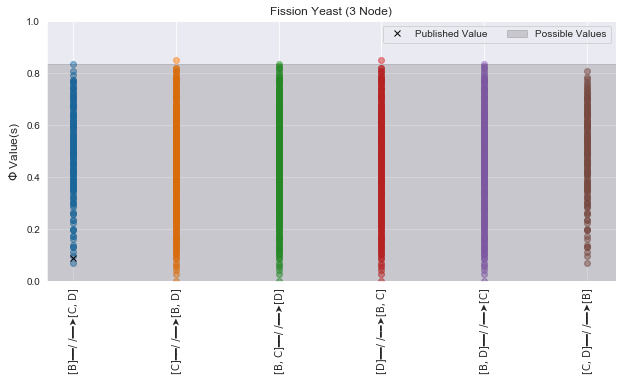

In [6]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
# font_path = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Plot published value and possible values
plt.plot([0],pyphi_val,'kx',label=r'Published Value')
ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible Values')
# ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible $\Phi^{Max}$ Values')

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    ## Plot
    plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)
    x_labels.append(cut_label)
    
## Clean Up
plt.title('Fission Yeast (3 Node)')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xticks(range(len(Phi_Spectrum[0])),x_labels,rotation=90,fontproperties=font)
plt.ylim((0.0,1.0))
plt.legend(ncol=2)
# plt.legend(ncol=1,bbox_to_anchor = [1.25,1.0],prop=font,fontsize=12)
plt.tight_layout()
plt.savefig("Fission_Yeast_3_node.pdf")
plt.show()

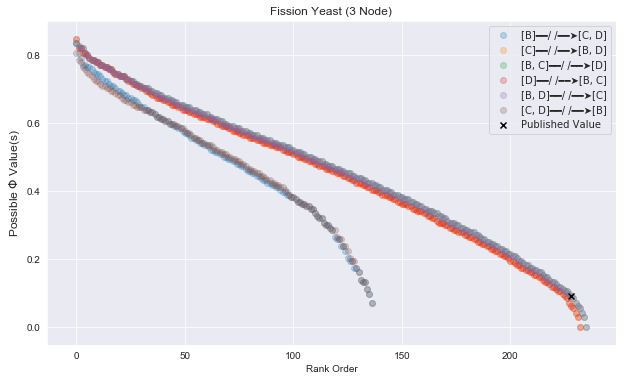

In [27]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    sorted_values = sorted(set(Phi_Spectrum[1][i]),reverse=True)
    if pyphi_val in sorted_values:
        pyphi_index = i
        pyphi_x = sorted_values.index(pyphi_val)
    
    plt.scatter(range(len(sorted_values)),sorted_values,alpha=0.25,label=cut_label)
    
# Plot the PyPhi Value
plt.scatter(pyphi_x,pyphi_val,marker='x',color='black',label='Published Value')

## Plot the theoretical max
# plt.axhline(1.5,linestyle='--',color='black',alpha=0.5,label='Upper Bound')

## Finish Plotting
plt.title('Fission Yeast (3 Node)')
plt.ylabel(r'Possible $\Phi$ Value(s)',fontsize=12)
plt.xlabel('Rank Order')
# plt.ylim((0.0,.85))
plt.legend(prop=font,ncol=1)
plt.tight_layout()
plt.savefig("FISSION_YEAST_RANK_ORDER.pdf")
plt.show()